# Intro

This is an ipython notebook that is runnable from the cloud.   Each cell in the notbook can be run seperately by clicking on it and hitting ctrl+enter.   Once a cell is run, all the global variables are saved, so you can run other cells using variable you've already initialized.

First thing you should do is run all the cell by either hitting ctrl+enter for each cell or by choosing **Kernel** and **Restart and run all** from the menu above.

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib.pyplot   import legend, figure

import lib.constants     as constants
import lib.mc_density    as mc_density
import lib.mc_interior   as mc_interior
import lib.temperature   as temperature

# Basics:  

There are two key classes in this library.   

## MCDensity
This is a model of a planet that contains a series of shells, each with a fixed density.
The (outer) radius and the density of each shell may be specified.   For ease and convenience 
we also provide functions to automatically generate a planet model with a specified number of 
shells and monotonically increasing (as you head to the center) density.  Note that all values
are in CGS units unless otherwise specified.
                 
Given such a model, the following functions are available:
                 
- **get_mass()**     : Returns the total mass of the planet.

- **get_moment()**   : Returns the total moment of inertia of the planet.

- **get_mass_moment_ratio()** : Returns the mass/moment ratio.

- **get_radii()**    : Returns an array of the outer radii of each shell.

- **get_densities()** : Returns an array of the densities of each shell.

- **get_pressure()** : Returns an array of the pressure of each shell.

- **plot_densities()** : Plots the values of get_densities().

- **plot_pressure()** : Plots the values of get_pressure().

### MCDensityFactory
A Factory is a simple Pattern for constructing objects with a lot of variables.  In our case,
the MCDensityFactory gets a mass, a moment_ratio, and an outer radius, and it automatically constructs
an MCDensity object.   Optional parameters include the number of shells and the "smoothness" of the curve.



In [2]:
# Set for Uranus
mass = constants.URANUS.mass
moment_ratio = constants.URANUS.moment_ratio
radius = constants.URANUS.radius
num_shells = 100

In [3]:
d_model = mc_density.create_mcdensity(mass, moment_ratio, radius)

In [4]:
print("mass is %s:"%d_model.get_mass())
print("mass/moment ratio is %s"%d_model.get_mass_moment_ratio())

mass is 8.699999999999998e+28:
mass/moment ratio is 0.23


# Plots

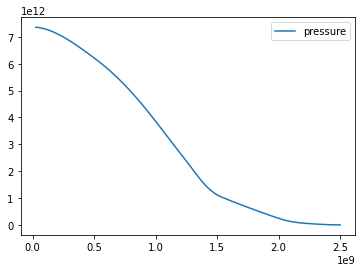

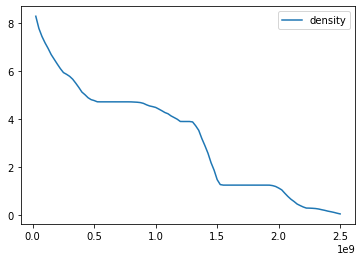

In [5]:
d_model.plot_pressure()
legend()
figure()
d_model.plot_densities()


## MCInterior
This class is an extended version of MCDensity.

In addition to density, it also contains a "composition" for each shell.
Currently, a composition is defined by three numbers (r,w,e) corresponding to
the fraction of "**rock**", "**water**", and "**env**" in each shell.   Note that this is 
somewhat of a legacy definition, as "rock" can means SiO2, dunite, or even "Z", 
a combination of dunite and water.

Regardless of what (r,w,e) mean, these values have a 1-1 mapping to a single "composition" 
value.   We require this scalar value to be monotonically increasing toward the center of the
model.

Once we have a composition for each shell, the following functions are available:
                 
Given such a model, the following functions are available:
                 
- **get_rock_pct()**     : Returns an array with the percent of "rock" in each shell.

- **get_env_pct()**   : Returns an array with the percent of "env" in each shell.

- **compute_env_mass()** : Returns the total mass of "env" in the model.

- **compute_water_mass()**    : Returns the total mass of "water" in the model.

- **compute_rock_mass()** : Returns the total mass of "rock" in the model.

- **compute_ratios()** : Returns "rock"/"water"/"env" ratios in the model.

- **plot_env()** : Plots get_env_pct().

- **plot_water()** : Plots get_water_pct.

- **plot_rock()** : Plots get_rock_pct().

The main property we are able to compute with the addition of composition is the temperature
in the model.   In order to do so, we need to build/load temperature tables for each of the 
materials in the composition of the planet and combine them to form a temperature **Catalog**.
For convenience, this library already includes three such catalogs:

- **dunite_water_env_catalog()**
- **sio2_water_env_catalog()**
- **z_env_catalog()**  -- note that this catalog only has two materials.

For each of these:

- "env" is a mix of 75% Hydrogen, 25% Helium.
- "dunite" is a mix of 24% Iron, 76% SiO2.
- "Z" is a mix of 65% Dunite, 35% Water.


### MCInteriorFactory
Once again, the Factory allows us to create a random model with fewer parameters.
Note that there is no guarantee with this method that the temperature will be monotonic,
only that the composition is.   In order to get a monotonic temperature, we need to be 
more carerful.

In [6]:
pct_rock, pct_water, pct_env  = 0.6, 0.3, 0.1
catalog = temperature.sio2_water_env_catalog()

i_model = mc_interior.create_mcinterior(mass, moment_ratio, radius, pct_rock, pct_env, catalog)

In [7]:
r,w,e = i_model.compute_ratios()
print("The rock/water/env ratios are: (%s,%s,%s)"%(r,w,e))

The rock/water/env ratios are: (0.6,0.3,0.1)


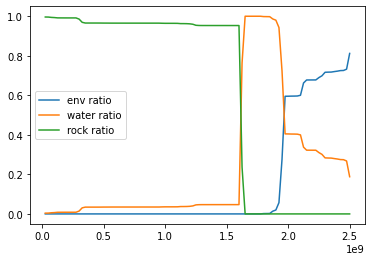

In [8]:
i_model.plot_env()
i_model.plot_water()
i_model.plot_rock()
legend()

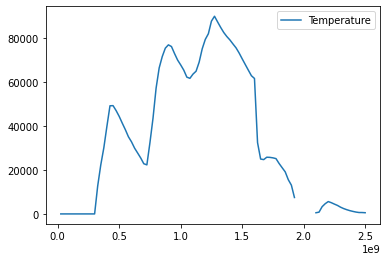

In [9]:
# NOTE:

# When creating the composition model, we didn't initially require that "rock" and "env" not overlap.   
# Nowadays we do have a sanity check for this and throw an error when this happens.   If you get it here,
# Just create a new model by running cell #6 again (or restarting the kernel).  This happens about
# 50% of the time that I can tell, so might need to refresh more than once.

# TODO:  
# Make this a bit more robust.

i_model.plot_temp()
legend()